Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"
LGMVIP August-23
AUTHOR - Riddhi Gupta
BEGINNER LEVEL TASK

Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

DatasetLink : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Load and Explore the Dataset

In [5]:
# Load the dataset from a local CSV file

csv_file_path = '/Users/riddhi/Git/Beginner/Task 2 Stock Market Prediction And Forecasting Using Stacked LSTM/NSE-TATAGLOBAL.csv'

df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


Preprocess the Data

In [7]:
# Extract the 'Close' column for prediction
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = len(dataset) - int(np.ceil(0.1 * len(dataset)))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3-dimensional (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


Build the Stacked LSTM Model

In [8]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

Train the Model

In [9]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1771/1771 [==============================] - 25s 13ms/step - loss: 0.0017


Create Test Data and Make Predictions

In [10]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]

# Create x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)

# Reshape the data to be 3-dimensional (samples, time steps, features)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 7ms/step


Visualize the Predictions

/var/folders/4v/zpj4rzz57sg3s0rkqbg37krw0000gn/T/ipykernel_91344/4188280826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


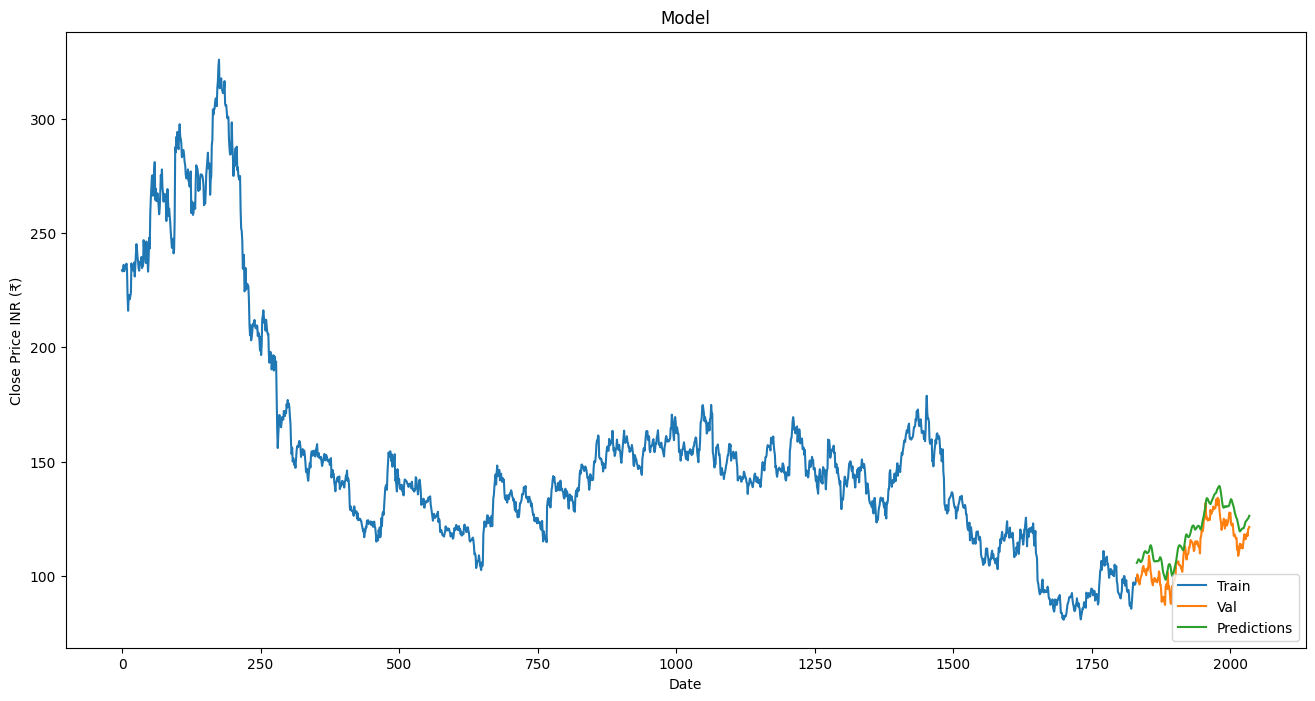

In [11]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()